In [248]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
%ls /content/drive/MyDrive

'1_181180080_EREN YILMAZ (1).rar'       ErenYılmaz_181180080_Ödev3.docx
'1_181180080_EREN YILMAZ.rar'          'Lab Ödev 03.12.2020 (1).gdoc'
 CENG307_181180080_HW1/                'Lab Ödev 03.12.2020.gdoc'
 CENG307_181180080_HW1.rar              ProjeBildirimFormu.pdf
 Classroom/                             train.csv
'Colab Notebooks'/                     'Untitled Diagram.drawio'
'Eren YILMAZ 181180080 6.şube.pdf'      WIN_20210420_00_53_40_Pro.mp4
'ErenYılmaz_181180080_Ödev3 (1).docx'


ereren

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [298]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S


Questions:
1. Please show all the information that belongs to the first six passengers. You should have 6 

In [299]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",0,34.0,0,0,248698,13.0000,D56,S


2. Please list the attributes (column titles).


In [278]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3. Please show the size of the dataset: (the number of passengers only). Do not forget to write 
what the output of your script refers to.


In [279]:
df.shape




(891, 12)

df.shape returns the shape of the dataset. This is a tuple. The first element is number of rows and the second elements number of the columns.

4. Please check how many missing values there are in the dataset for the columns “Age”,“Cabin”
and “Embarked”. Missing values will have a null value (NaN). Do not forget to write how many 
missing values there are for each of these three columns in the comments


In [280]:
df[['Age','Cabin','Embarked']].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

now I remove the rows with NaN for these specific attributes


In [301]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [302]:
df.dropna(inplace=True)

In [303]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

5. Please create a pie chart that shows the percentage of passengers that embarked from each 
port (Southampton, Cherbourg, Queenstown). Explain in your comments which port the most 
number of people embarked from and which port the least amount of people embarked from.

In [259]:
df['Embarked'].value_counts().tolist()

[116, 65, 2]

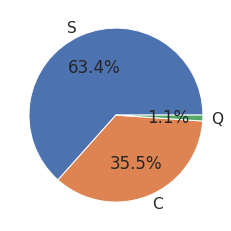

In [260]:
y = df['Embarked'].value_counts().tolist()
mylabels = df['Embarked'].value_counts().index.tolist()

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

Southampton is the most embarked port
Queenstown is the least embarked port


6. Please create a bar chart that shows the number of passengers traveling for each class. (You 
should have three bars referring to each class). Please explain which class had the most 
number of passengers.



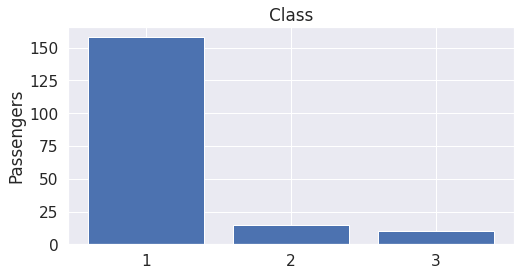

Class: 
1    158
2     15
3     10
Name: Pclass, dtype: int64


In [261]:
#get column
var = df["Pclass"]
# count number of categorical variable(value/sample)
varValue = var.value_counts()

#visualize
plt.figure(figsize = (8,4))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Passengers")
plt.title("Class")
plt.show()
print("{}: \n{}".format("Class",varValue))

First class had the most number of passengers. 
Third class had the least number of passengers

7. Please create a plot that shows the number of female passengers for each ticket class who 
survived and who did not survive in bar chart format. (You should have three bar charts (for 
each ticket class) referring to passengers of ticket class 1 who survived and didn’t survive, 
passengers of ticket class 2 who survived and didn’t survive, and so on)

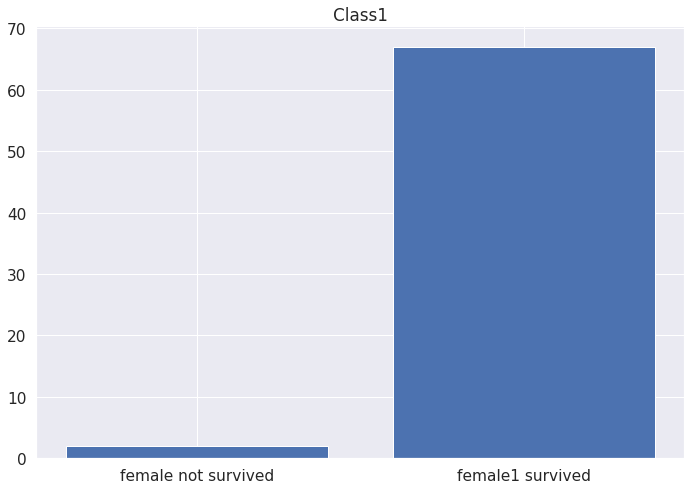

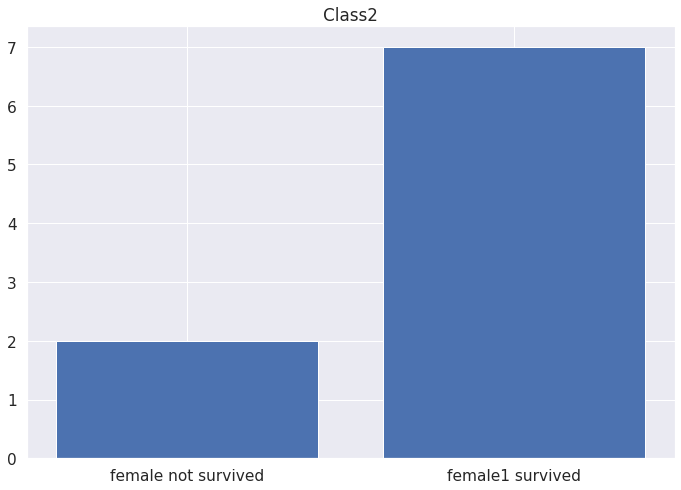

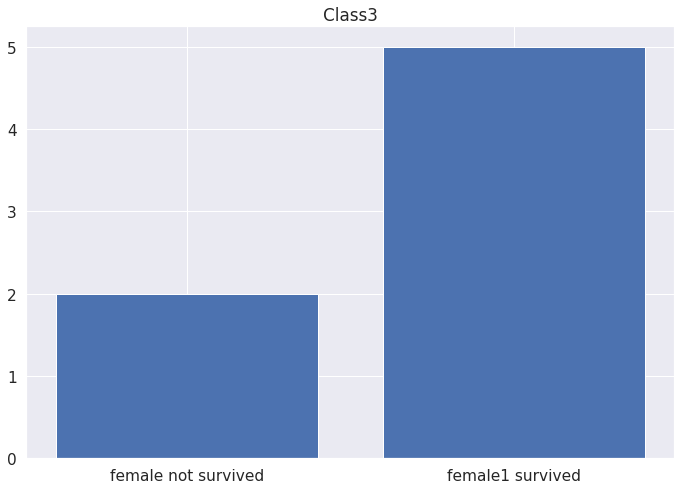

In [262]:
data_len = df[df["Pclass"]==1].shape[0]
i = 0
df0 = pd.DataFrame(columns = ["Survived","Sex"])
df1 = pd.DataFrame(columns = ["Survived","Sex"])

while i < data_len:
    if df.iloc[i,1] == 0 and df.iloc[i,4] == "female":
        df0 = df0.append(df.iloc[i,[1,4]])
    if df.iloc[i,1] == 1 and df.iloc[i,4] == "female":
        df1 = df1.append(df.iloc[i,[1,4]])
   
    i = i + 1
    
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1.5])
labels = ['female not survived', 'female1 survived']
number = [df0.shape[1],df1.shape[0]]
ax.bar(labels,number)
plt.title("Class1")
plt.show()

data_len = df[df["Pclass"]==2].shape[0]
i = 0
df0 = pd.DataFrame(columns = ["Survived","Sex"])
df1 = pd.DataFrame(columns = ["Survived","Sex"])

while i < data_len:
    if df.iloc[i,1] == 0 and df.iloc[i,4] == "female":
        df0 = df0.append(df.iloc[i,[1,4]])
    if df.iloc[i,1] == 1 and df.iloc[i,4] == "female":
        df1 = df1.append(df.iloc[i,[1,4]])
   
    i = i + 1
    
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1.5])
labels = ['female not survived', 'female1 survived']
number = [df0.shape[1],df1.shape[0]]
ax.bar(labels,number)
plt.title("Class2")
plt.show()



data_len = df[df["Pclass"]==3].shape[0]
i = 0
df0 = pd.DataFrame(columns = ["Survived","Sex"])
df1 = pd.DataFrame(columns = ["Survived","Sex"])

while i < data_len:
    if df.iloc[i,1] == 0 and df.iloc[i,4] == "female":
        df0 = df0.append(df.iloc[i,[1,4]])
    if df.iloc[i,1] == 1 and df.iloc[i,4] == "female":
        df1 = df1.append(df.iloc[i,[1,4]])
   
    i = i + 1
    
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1.5])
labels = ['female not survived', 'female1 survived']
number = [df0.shape[1],df1.shape[0]]
ax.bar(labels,number)
plt.title("Class3")
plt.show()



8. Please create two boxplots that show the key age statistics of female and male passengers 
who survived and who did not survive. (You should have two boxplots, one for female 
passengers and one for male passengers, each of these box plots having two boxes for the
passengers who survived and who didn’t, and each of these boxes should communicate key 
age statistics related to each group (e.g. female who survived)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


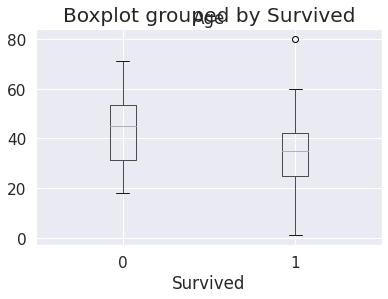

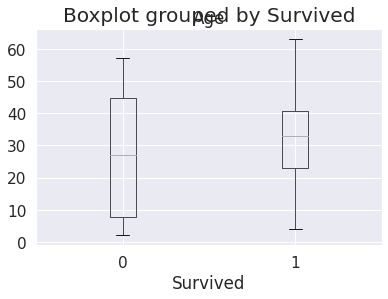

In [263]:
male = df[df["Sex"] == "male"]
female = df[df["Sex"] == "female"]
male.boxplot('Age', by ="Survived") 
female.boxplot('Age', by ="Survived")


9. Please create a cross table as shown below (x will be computed and included in your answer)

In [264]:
pd.crosstab(df["Sex"], df["Survived"], margins=True)


Survived,0,1,All
Sex,,,
female,6,82,88
male,54,41,95
All,60,123,183


10.The cross table makes it possible to get information about how many people for each gender 
have survived etc. Please indicate which gender has the most number of survivors. Explain 
 which gender had a higher survival rate. What might be the reason?

The number of surviving women is much higher than men due to the fact that women first entered the rescue boat
In the description part of the data set, it was said that there were not enough rescue bots.
I think women and children get on the rescue boats first.Therefore, we can say that the 
survival rate for men is very low.

11. Please create a heatmap for the correlation between the attributes of survival, age, sex, fare, 
and ticket class. You may use seaborn or plotly libraries for this question.

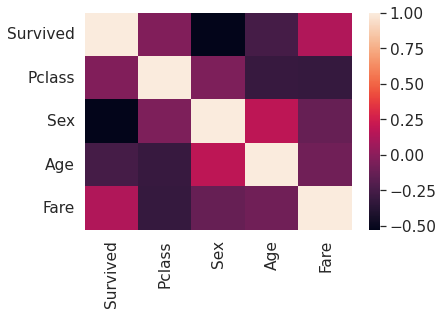

In [265]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]]
sns.heatmap(df[["Survived","Pclass","Sex","Age","Fare"]].corr())
plt.show()

12. Please calculate the “Pearson” standard correlation coefficient for each correlation 
mentioned in Q11 and show it on the heatmap you created for Q11. You may use seaborn or 
plotly libraries for this question. How is survival is correlated to ticket class? Please explain.

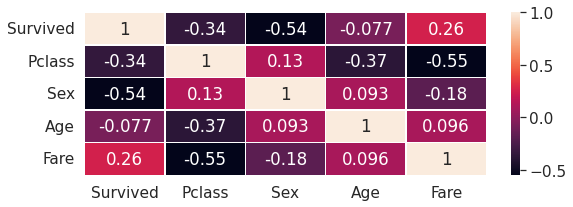

In [272]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]]
train_corr = df[["Survived","Pclass","Sex","Age","Fare"]].corr(method='pearson')
plt.figure(figsize=(9, 3))
sns.set(font_scale=1.4)
sns.heatmap(train_corr, 
            annot=True,
            linecolor='white', 
            linewidth=0.5);

13. What is the age of the youngest passenger?


In [288]:
min_age = df["Age"].min()
print("The youngest person among the passengers is " + str(min_age) + " years old")

The youngest person among the passengers is 0.92 years old


14. How much is the average fare?

In [289]:
mean_fare = df["Fare"].mean()
print("The average fare is " + str(mean_fare))


The average fare is 78.68246885245901


15. What is the age of the oldest passenger who survived?

In [295]:
oldest_survived = df[df["Survived"]==1]["Age"].max()
print("Oldest passenger who survived :" + str(oldest_survived))

Oldest passenger who survived :80.0


16. What is the age of the oldest female passenger who survived?

In [296]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]]
y = df[(df.Survived==1) & (df.Sex == 0)]['Age'].max()
print(y)


80.0


17. Are there any children under the age of 10 traveling without their parents? What might this 
indicate?




In [304]:
def age_range(x):
    if x>=0 and x <10:
        return 'Child'


df[df["Parch"] == 0]['Age'].apply(age_range).value_counts()

Series([], Name: Age, dtype: int64)

Only one child fits this profile. Probably this boy got on the ship illegally.

18. Please plot the histograms that show the age distribution of the female and male passengers 
who survived. (You can arrange 10 bins for the range of ages [0 to 100].) You should have two 
histograms overlayed on top of each other in different colors. You may use seaborn or plotly
libraries for this question. Please explain which gender had a higher survival chance by looking 
at these histograms.


[Text(0, 0.5, 'Age')]

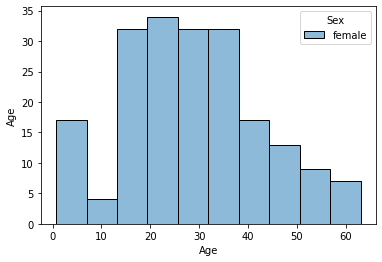

In [ ]:
df_fem= df[df['Sex']=="female"]
female_survived = df_fem[df_fem["Survived"]==1]
ax = sns.histplot(female_survived, x ="Age", bins=10, hue="Sex")
ax.set(ylabel="Age")

19. What is the number of siblings of the passenger who has the highest number of siblings?


In [ ]:
Siblings = df["SibSp"].max()
print("Number of siblings of the passenger with the highest number of siblings" ,Siblings)

#Shows the number of people with the most siblings

Number of siblings of the passenger with the highest number of siblings 8


20. Please plot a scatterplot that shows the age–fare correlation for passengers who survived 
and who did not survive. (You should have age on the x-axis and fare on the y-axis, and you 
should color code the passengers according to their survival) You may use seaborn or plotly
libraries for this question.

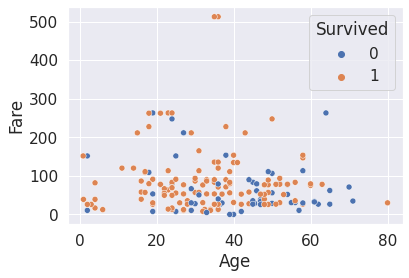

In [ ]:
sns.scatterplot(data=df, x="Age", y="Fare",hue='Survived')